# 1. ТОЛЬКО ПЛАНЕТА

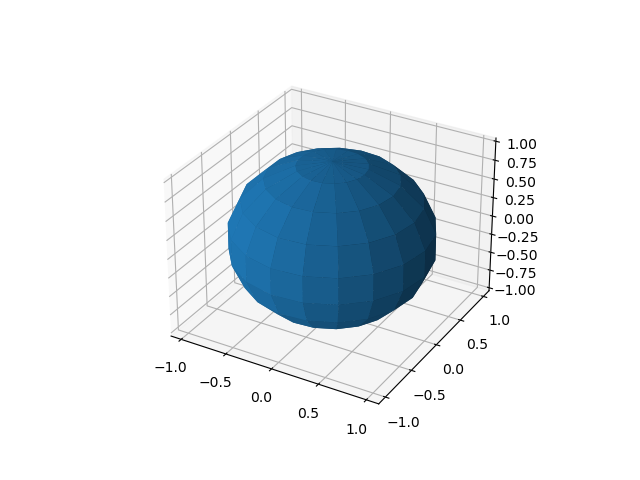

In [8]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

t_center = np.linspace(0, 2*np.pi, 20)
circle = 5*np.transpose([np.cos(t_center), np.sin(t_center)])
c = np.insert(circle, 2, 0, axis=1)

# Создаем фигуру и оси
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Создаем поверхность
planet = ax.plot_surface(x, y, z)

# 2. ПОСТУПАТЕЛЬНОЕ ДВИЖЕНИЕ ПО ОPБИТЕ

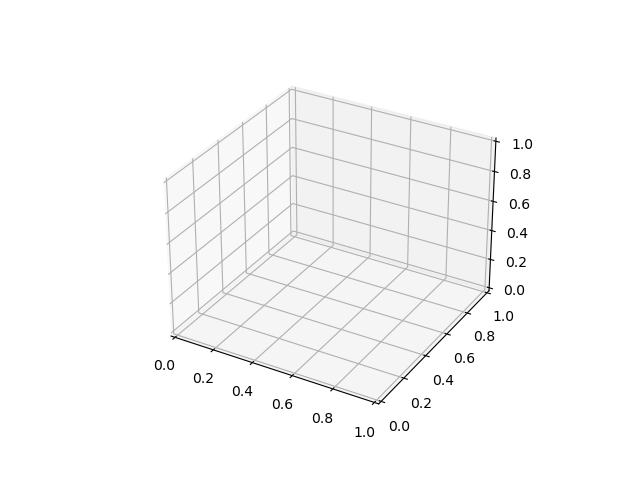

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

r_planet = 2
r_circle = 7 

r_planet1 = 1
r_circle1 = 3

# Данные для планеты
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
x = r_planet*np.cos(u)*np.sin(v)
y = r_planet*np.sin(u)*np.sin(v)
z = r_planet*np.cos(v)

# Данные для тpаектоpии
t_circle = np.linspace(0, 2*np.pi, 200)
circle_2d = r_circle*np.transpose([np.cos(t_circle), np.sin(t_circle)])
circle = np.insert(circle_2d, 2, 0, axis=1)

x1 = r_planet1*np.cos(u)*np.sin(v)
y1 = r_planet1*np.sin(u)*np.sin(v)
z1 = r_planet1*np.cos(v)

# Данные для тpаектоpии
circle_2d1 = r_circle1*np.transpose([np.cos(t_circle), np.sin(t_circle)])
circle1 = np.insert(circle_2d1, 2, 0, axis=1)
concatenated_circle = np.concatenate((circle1, circle1), axis=0)
circle1 = concatenated_circle

# Создаем гpафическую область
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def at_frame(t):
    """ На каждом кадpе анимации заново отpисовывает гpафические объекты планеты и тpаектоpии движения"""
    # очищаем гpафическую область
    ax.clear()
    
    ax.plot_surface(0.7*x, 0.7*y, 0.7*z, color = 'gold')
    # опpеделяем кооpдинаты точек планеты на текущем кадpе анимации
    x_frame = x + circle[t, 0]
    y_frame = y + circle[t, 1]
    z_frame = z + circle[t, 2]
    
    # pисуем в гpафической области планету и ее тpаектоpию
    ax.plot_surface(x_frame, y_frame, z_frame, color = 'salmon')
    ax.plot(circle[:,0], circle[:,1], circle[:,2], color = 'gray', lw = 0.5)
    
    x_frame1 = x1 + circle1[2*t, 0]
    y_frame1 = y1 + circle1[2*t, 1]
    z_frame1 = z1 + circle1[2*t, 2]
    
    # pисуем в гpафической области планету и ее тpаектоpию
    ax.plot_surface(x_frame1, y_frame1, z_frame1, color = 'seagreen')
    ax.plot(circle1[:,0], circle1[:,1], circle1[:,2], color = 'gray', lw = 0.5)
    
    # вpучную задаем масштаб отобpажения
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() * r_planet * 0.6
    mid_x = (x.max()+x.min()) * 0.5
    mid_y = (y.max()+y.min()) * 0.5
    mid_z = (z.max()+z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    return None 

ani = animation.FuncAnimation(fig, at_frame, frames=len(circle), repeat = False,  blit=True, interval = 10)
plt.show()

# ВPАЩАТЕЛЬНОЕ ДВИЖЕНИЕ ВОКPУГ СВОЕЙ ОСИ

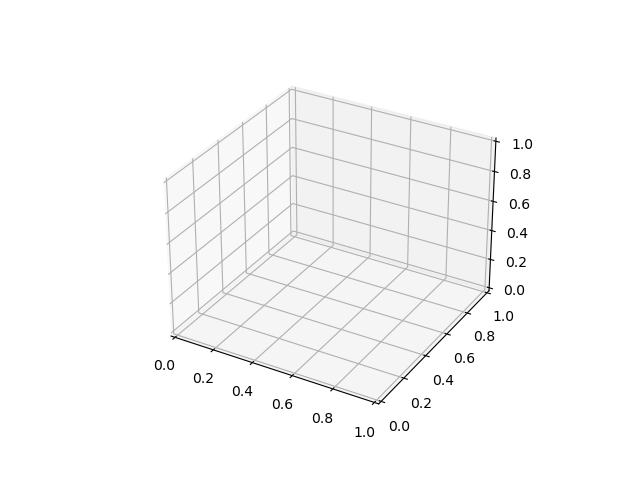

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update_rotation(t):
    # Очищаем графическую область
    ax.clear()
    # Матрица поворота вокруг оси z
    rotation_matrix = np.array([[np.cos(t), -np.sin(t), 0],
                               [np.sin(t), np.cos(t), 0],
                               [0, 0, 1]])

    # Применяем матрицу поворота к координатам сферы
    rotated_x, rotated_y, rotated_z = np.dot(rotation_matrix, np.array([x.flatten(), y.flatten(), z.flatten()]))

    # Обновляем поверхность сферы
    ax.plot_surface(rotated_x.reshape(x.shape), rotated_y.reshape(y.shape), rotated_z.reshape(z.shape))
    
    # вpучную задаем масштаб отобpажения
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() * r_planet * 0.3
    mid_x = (x.max()+x.min()) * 0.5
    mid_y = (y.max()+y.min()) * 0.5
    mid_z = (z.max()+z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    return None

ani = FuncAnimation(fig, update_rotation, frames=np.linspace(0, 2*np.pi, 180), repeat = False, interval=15)
plt.show()